In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF , LatentDirichletAllocation 
from pprint import pprint
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import string
from wordcloud import WordCloud, STOPWORDS
print("done!")

done!


In [2]:
df = pd.read_excel('depression.xlsx')
df.head()

Comments Text
0  So, when you ask what the two illnesses are......
1  In addition, people with BPD quite often have ...
2  Borderline Personality Disorder, like all othe...
3  LONG ANSWER: Bipolar disease is caused by a ch...
4  Well think of bipolar as a rollar coaster you ...

In [3]:
len(df)

7145

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Comments Text  7145 non-null   object
dtypes: object(1)
memory usage: 55.9+ KB


In [5]:
df.rename(columns={"Comments Text": "text"}, inplace=True)

In [6]:
df['ids'] = df.index

In [7]:
df_text = df[["ids", "text"]]
df_text.head()

ids                                               text
0    0  So, when you ask what the two illnesses are......
1    1  In addition, people with BPD quite often have ...
2    2  Borderline Personality Disorder, like all othe...
3    3  LONG ANSWER: Bipolar disease is caused by a ch...
4    4  Well think of bipolar as a rollar coaster you ...

In [8]:
df_text.isnull().sum()

ids     0
text    0
dtype: int64

In [9]:
def clean_tweets(comment: str):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    url_removed =  url_pattern.sub(r'', comment)
    at_removed = re.sub('\S*@\S*\s?', '', url_removed)
    new_line_removed = re.sub('\s+', ' ', at_removed)
    quote_removed = re.sub("\'", "", new_line_removed)
    cleaned_tweet = quote_removed.replace(".", "")
    cleaned_tweet = quote_removed.replace(",", "")
    cleaned_tweet = quote_removed.replace("!", "")
    cleaned_tweet = quote_removed.replace("?", "")
    cleaned_tweet = quote_removed.replace("(", "")
    cleaned_tweet = quote_removed.replace(")", "")
    return cleaned_tweet


In [10]:
df_text["text"] = df_text["text"].apply(clean_tweets)

In [11]:
pd.set_option("display.max_colwidth", -1)
df_text.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13004\2148169660.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


ids  \
0  0     
1  1     
2  2     
3  3     
4  4     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [12]:
def create_wordcloud(dataset, title="Wordcloud", column_name="text"):
    text_to_analyze = ''
    for i in dataset[column_name]:
        text_to_analyze = text_to_analyze + ' ' + i
    wc = WordCloud(collocations=False, stopwords=STOPWORDS, background_color='white', colormap='Dark2',
                max_font_size=150, random_state=42)
    wc = wc.generate(text_to_analyze)
    # Wordcloud plot
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

In [13]:
# # stemming and tokenization . 
# stemmer = nltk.stem.SnowballStemmer("english")
# nltk.download("stopwords")
# stop_words = set(nltk.corpus.stopwords.words("english"))

## Vectorization. 

In [14]:
tfidvector = TfidfVectorizer( max_df=0.6, max_features=1000, ngram_range=(1,2), stop_words="english" )

In [15]:
tfidf_matrix = tfidvector.fit_transform(df_text["text"])

In [16]:
tfidf_matrix

<7145x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 138457 stored elements in Compressed Sparse Row format>

In [17]:
tfidvector.get_feature_names()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 '10 years',
 '100',
 '12',
 '15',
 '17',
 '18',
 '20',
 '25',
 '30',
 '40',
 'abilify',
 'ability',
 'able',
 'absolutely',
 'abuse',
 'accept',
 'act',
 'actually',
 'add',
 'addiction',
 'addictive',
 'adhd',
 'admit',
 'adult',
 'advice',
 'affect',
 'affects',
 'afraid',
 'age',
 'ago',
 'agree',
 'alarm',
 'alarms',
 'alcohol',
 'alive',
 'allow',
 'alot',
 'amazing',
 'anger',
 'angry',
 'answer',
 'anti',
 'antidepressant',
 'antidepressants',
 'anxiety',
 'anxiety attacks',
 'anxiety bipolar',
 'anxiety depression',
 'anxiety disorder',
 'anxiety im',
 'anxiety meds',
 'anxiety panic',
 'anxiety ptsd',
 'anxious',
 'anymore',
 'appointment',
 'area',
 'arent',
 'ashamed',
 'ask',
 'asked',
 'asking',
 'asleep',
 'attack',
 'attacks',
 'attention',
 'available',
 'avoid',
 'aware',
 'away',
 'awful',
 'baby',
 'bad',
 'bad days',
 'basically',
 'battle',
 'bc',
 'beat',
 'beautiful',
 'bed',
 'begin',
 'beginning',
 'behavior',
 'believe',
 'benefit',
 'best',
 'best thi

## Building nmf

In [18]:
no_of_topics = 10

In [19]:
nmf_model = NMF(n_components=no_of_topics)

In [20]:
nmf_model.fit(tfidf_matrix)

NMF(n_components=10)

In [21]:
len(tfidvector.get_feature_names())

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1000

In [22]:
for index, topic in enumerate(nmf_model.components_):
    print(f"Top 10 words for topic {index}")
    print([tfidvector.get_feature_names()[i] for i in topic.argsort()[-10:]])

Top 10 words for topic 0
['mental', 'time', 'need', 'things', 'life', 'people', 'like', 'help', 'feel', 'just']
Top 10 words for topic 1
['works', 'severe anxiety', 'bipolar depression', 'suffer', 'severe', 'helps', 'anxiety depression', 'depression anxiety', 'depression', 'anxiety']
Top 10 words for topic 2
['afraid', 'im going', 'im afraid', 'struggling', 'just', 'scared', 'im sorry', 'sorry', 'ive', 'im']
Top 10 words for topic 3
['fight', 'hard', 'times', 'days', 'understand', 'everyday', 'day', 'daily', 'real', 'struggle']
Top 10 words for topic 4
['different', 'medication', 'doctor', 'work', 'good', 'years', 'taking', 'sleep', 'ive', 'meds']
Top 10 words for topic 5
['day', 'latuda', 'thats', 'night', 'effexor', 'effects', 'drug', 'yes', 'feeling', 'horrible']
Top 10 words for topic 6
['gave', 'bad', 'having', 'anxiety attacks', 'anxiety panic', 'panic attack', 'attack', 'panic attacks', 'attacks', 'panic']
Top 10 words for topic 7
['personality disorder', 'borderline', 'anxiety 

In [23]:
topic_results = nmf_model.transform(tfidf_matrix)
topic_results

array([[0.03149847, 0.00098166, 0.        , ..., 0.00957126, 0.        ,
        0.        ],
       [0.06492716, 0.00376477, 0.        , ..., 0.02677591, 0.00075485,
        0.04892764],
       [0.0622916 , 0.        , 0.        , ..., 0.03498737, 0.        ,
        0.04955701],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06145604, 0.        , ..., 0.00857349, 0.        ,
        0.        ],
       [0.        , 0.02810122, 0.        , ..., 0.        , 0.        ,
        0.00590117]])

In [24]:
df_text["label"] = topic_results.argmax(axis=1)

In [25]:
df_text.iloc[5:15]

ids  \
5   5     
6   6     
7   7     
8   8     
9   9     
10  10    
11  11    
12  12    
13  13    
14  14    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  \
5   Believe me, I show you much more than anyone. I still have lots of work to do but I trust you completely. I hope you feel the same. You can share anything with me Li, no worries.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
6   Yes, I feel the exact same way. My family avoids me all ways/always now. I have no place in my family and no voice either. I now choose not to give them any info if at all possible. All they do now is hurt me and leave me out of all family functions and matters because I am not strong enough. This is the time you find your true family and friends. Facebook has helped me tremendously. I will not validate their behavior because it is so stereotypical. They choose to remain ignorant.                                                                                                                                                                                                                                                                                                        
7   I was hospitalized in May for the same reason. Ive dealt with the loneliness that comes with it. Unless you know someone who has struggled with it, its really hard for others to relate. Problem is, it adds to the emotional mudslide that plagues us. I completely understand where you are coming from.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
8   I feel like that and im hearing you loud okay just a while ago, only an hour or so, I wás feeling like there was nothing in this world who will ever understand my feelings. I caught it and held onto it and felt that if I didnt live it wouldnt matter. I felt so hopeless that nobody understands and to understand is to love and if I didnt have love what would I do? Die? Im too frightened every time I try. So its not working death wont work its not our time. So what did I love? I love the world and I want to be a part of its healing. It doesnt matter if people understand its enough that I do and the very few who know and love me understand, the rest dont matter. They are the sad ones cos they dont allow their minds to open and t

In [26]:
def plot_word_cloud_per_cluster(total_cluster_no=no_of_topics, df=df_text, column_name="label"):
    for cluster_no in range(0,total_cluster_no):
        df_to_plot = df[df[column_name] == cluster_no]
        print(len(df_to_plot))
        create_wordcloud(df_to_plot, f"Wordcloud for cluster {cluster_no}")

depression , anxiety-depression, anxiety, stress, anxiety, depression, anxiety , depression ----> 8

1604


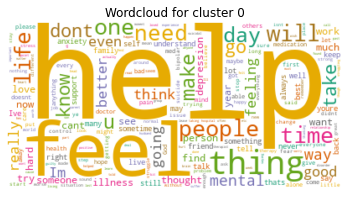

1062


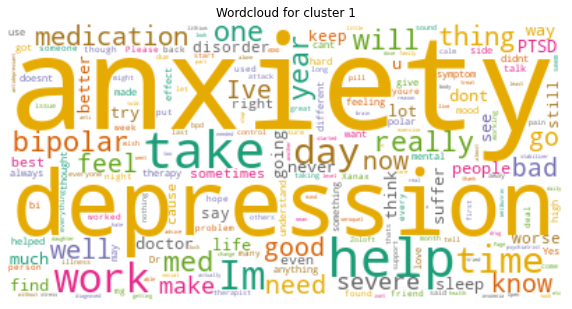

833


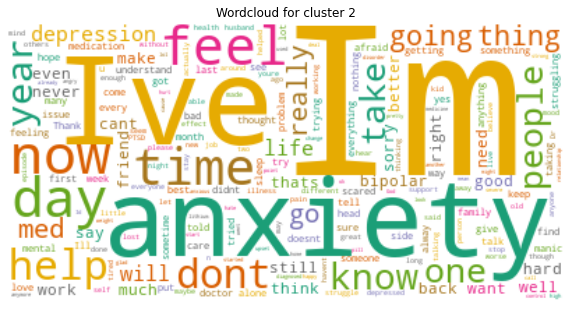

309


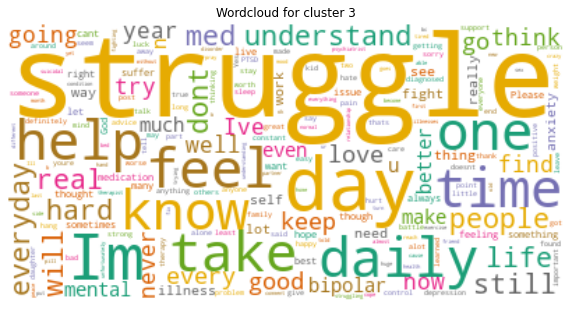

1042


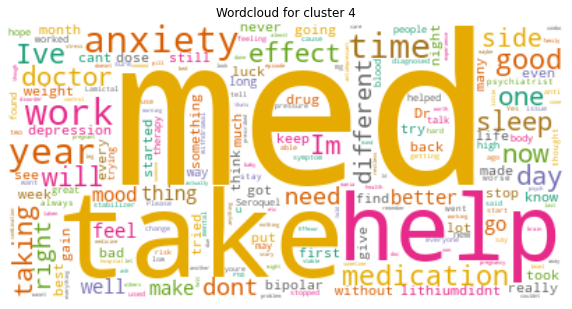

323


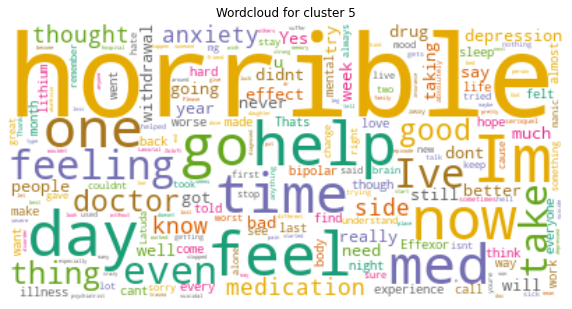

330


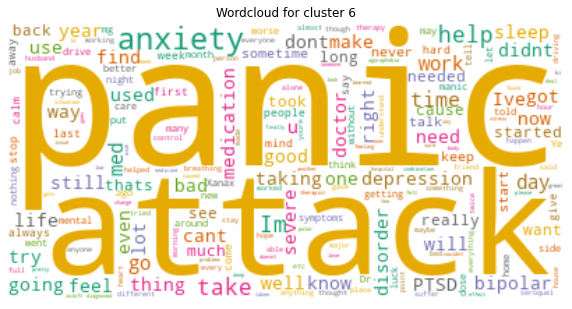

494


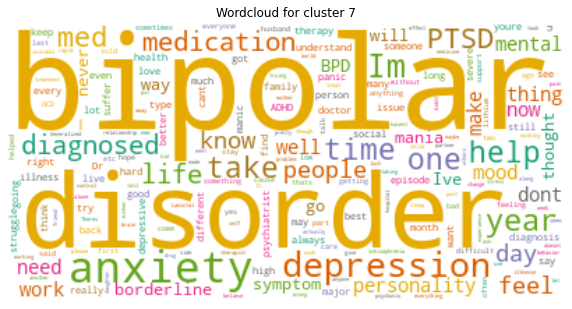

154


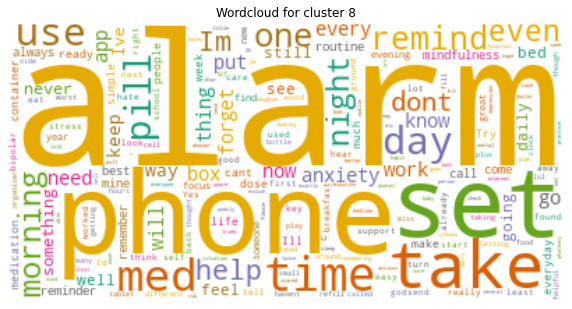

994


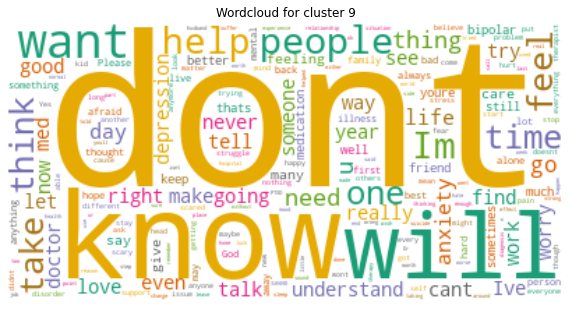

In [27]:
plot_word_cloud_per_cluster()

depression , depression , anxiety , stress, anxiety , depression ---> 6

depression , anxiety-depression, anxiety, stress, anxiety, depression, anxiety ----> 7

depression , anxiety-depression, anxiety, stress, anxiety, depression, anxiety , depression ----> 8

depression , anxiety-depression, anxiety, stress, anxiety, depression, anxiety , depression, unclear, depression  ----> 10


In [28]:
cvvector = CountVectorizer( max_df=0.6, stop_words="english" )

In [29]:
document_term_matric = cvvector.fit_transform(df_text["text"])

In [30]:
LDA = LatentDirichletAllocation(n_components=no_of_topics, random_state=42)

In [31]:
len(cvvector.get_feature_names())

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


14543

In [32]:
LDA.fit(document_term_matric)

LatentDirichletAllocation(random_state=42)

In [33]:
for index, topic in enumerate(LDA.components_):
    print(f"Top 10 words for topic {index}")
    print([cvvector.get_feature_names()[i] for i in topic.argsort()[-10:]])

Top 10 words for topic 0
['like', 'things', 'ive', 'people', 'know', 'really', 'just', 'good', 'feel', 'dont']
Top 10 words for topic 1
['ive', 'person', 'yes', 'weight', 'depression', 'life', 'god', 'like', 'mania', 'anxiety']
Top 10 words for topic 2
['bipolar', 'just', 'life', 'like', 'medication', 'mental', 'illness', 'anxiety', 'people', 'depression']
Top 10 words for topic 3
['depression', 'panic', 'attacks', 'like', 'really', 'helps', 'im', 'night', 'sleep', 'anxiety']
Top 10 words for topic 4
['right', 'work', 'dont', 'help', 'im', 'doctor', 'medication', 'good', 'anxiety', 'meds']
Top 10 words for topic 5
['years', 'ptsd', 'just', 'meds', 'ive', 'disorder', 'depression', 'bipolar', 'im', 'anxiety']
Top 10 words for topic 6
['want', 'years', 'im', 'going', 'right', 'help', 'time', 'meds', 'dont', 'just']
Top 10 words for topic 7
['really', 'mental', 'good', 'day', 'got', 'anxiety', 'years', 'time', 'struggle', 'just']
Top 10 words for topic 8
['use', 'day', 'just', 'attack', 'p

In [34]:
topic_results = LDA.transform(document_term_matric)
topic_results

array([[2.43951332e-03, 2.43968966e-03, 6.51296499e-01, ...,
        2.43974059e-03, 2.43985330e-03, 2.43977052e-03],
       [4.08287548e-04, 4.08289761e-04, 6.16454904e-01, ...,
        4.08245158e-04, 4.08238453e-04, 3.80279080e-01],
       [8.98897527e-01, 3.03097362e-04, 9.86777454e-02, ...,
        3.03085568e-04, 3.03068531e-04, 3.03116000e-04],
       ...,
       [1.42858850e-02, 1.42925437e-02, 1.42871785e-02, ...,
        1.42875580e-02, 1.42857144e-02, 1.42864994e-02],
       [3.84650167e-03, 3.84679887e-03, 3.84667151e-03, ...,
        3.84658571e-03, 3.84642320e-03, 3.84654897e-03],
       [6.66792697e-03, 6.66936602e-03, 6.66924402e-03, ...,
        6.66892946e-03, 6.66696066e-03, 6.66850943e-03]])

In [35]:
df_text["label_lda"] = topic_results.argmax(axis=1)


376


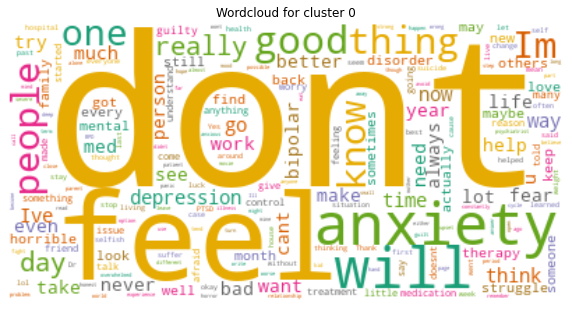

260


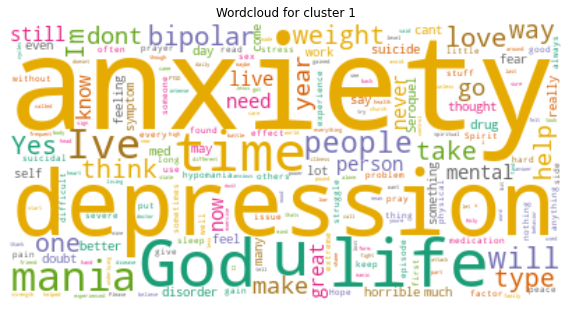

500


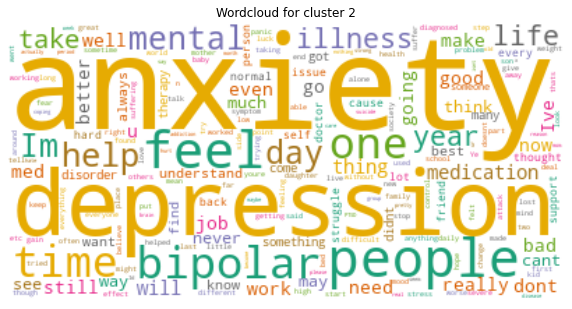

596


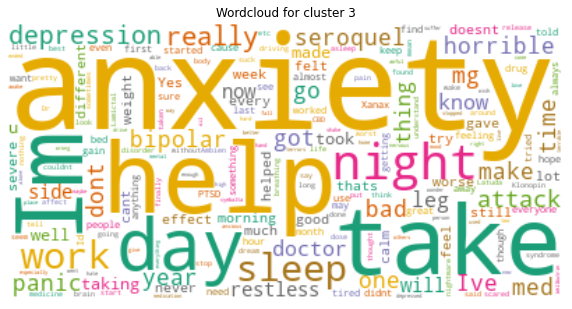

899


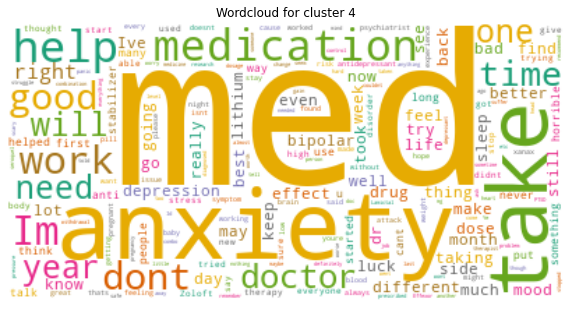

877


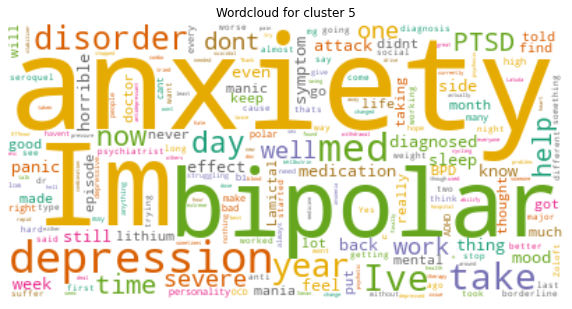

339


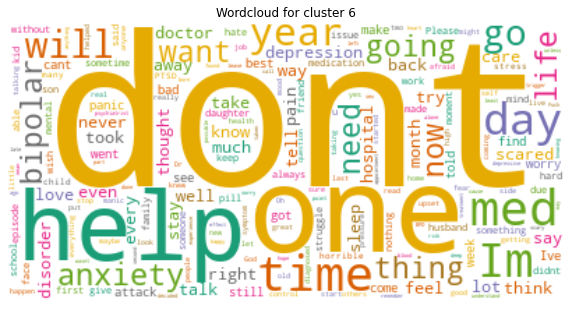

265


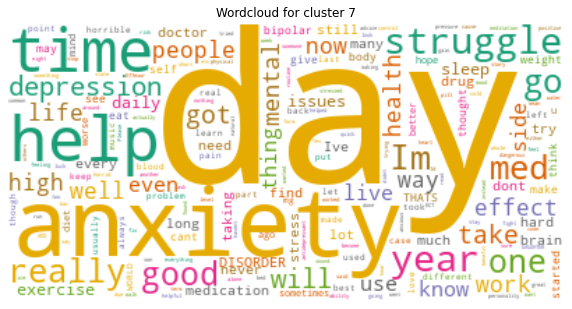

286


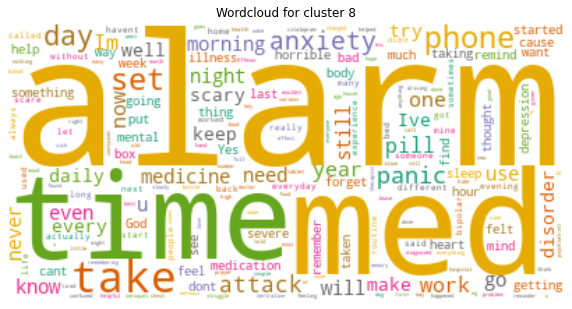

2747


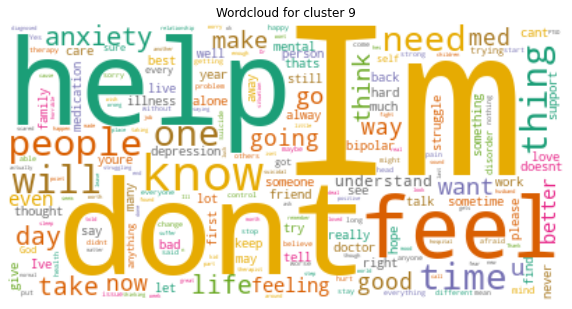

In [36]:
plot_word_cloud_per_cluster(column_name="label_lda")


## LDA seems to perform better 

In [37]:
lda_cluster_dictionary = {
    "0": "depression",
    "1": "depression",
    "2": "anxiety",
    "3": "stress"
}

In [38]:
nmf_cluster_dictionary = {
    "0": "depression",
    "1": "anxiety",
    "2": "anxiety",
    "3": "depression",
    "4": "uncategorized",
    "5": "anxiety",
    "6": "depression",
    "7": "depression",
    "8": "depression",
    "9": "depression",

}

# depression , anxiety-depression, anxiety, stress, anxiety, depression, anxiety , depression

In [39]:
df_text["label"] .unique()

array([0, 7, 9, 5, 2, 3, 4, 1, 8, 6], dtype=int64)

In [40]:
def map_columns(cluster: int):
    a = "unnamed"
    try:
        a =nmf_cluster_dictionary[str(cluster)]
    except:
        pass 
    return a

In [41]:
df_text["cluster"] = df_text["label"].apply(map_columns)

In [42]:
df_text.iloc[10:20]

ids  \
10  10    
11  11    
12  12    
13  13    
14  14    
15  15    
16  16    
17  17    
18  18    
19  19    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  \
10  No, but I have seriously thought about having it. I dont know, maybe desperation. Have discussed it with the psychiatrist off and on...do not know                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
11  Yes I do and its terrifying, know matter how I try to explain, they see from clear glass, mine is cloudy!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
12  Michelle OSullivan Yes, I just started it in July. We are moving very slowly and it takes a lot of getting used to. She was the one who suggested I ask my brother to check in on me once in a while but I went about it all the wrong ways and got too emotional. Then when he told me that he wouldnt tell me what he wanted to say to her I got uncomfortable like I was going to be thrown under the bus and then he got angry and just bit my head off.                                                                                                                                                                     
13  He just upped my anti-depressant last week. They arent upping my lithium because the salt makes me constantly thirsty and I am a heart patient and have a fluid restriction. Ive tried every other drug and theyre either bad for my heart or they have horrible side effects. The therapy Im learning is supposed to help with BPD but they said it will be really hard and take a lot of time to change my behavior.                                                                                                                                                                                                           
14  Yes, Ive been seeing psychiatrists for nearly 30 years. First just depression, then cyclothymia, then bipolar and anxiety, then BPD.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
15  My mom is one person who sets me off when Im agitated. I cant take being around her. And even when I tell her Im agitated and we should talk another time shell push until I snap and then make me

In [43]:
df_anxiety = df_text[df_text["cluster"] == "anxiety"]
len(df_anxiety)

2218

In [44]:
df_anxiety.iloc[12:50]

ids  \
50   50    
55   55    
56   56    
58   58    
62   62    
64   64    
65   65    
66   66    
69   69    
70   70    
77   77    
78   78    
79   79    
81   81    
82   82    
85   85    
91   91    
94   94    
96   96    
101  101   
108  108   
114  114   
115  115   
119  119   
120  120   
123  123   
126  126   
130  130   
132  132   
137  137   
144  144   
154  154   
160  160   
161  161   
163  163   
166  166   
170  170   
181  181   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                text  \
50   Hurtful question..n alot of insensitive comments. Its not like we can help it. So on top of hereditary mental health issues...i have to be forever single? That works wonders on depression n anxiety. Thanks. :(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
55   No..I suffer from anxiety...and clinical depression...I live with it..and it would very hard to be involved with someone who has same problem.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [45]:
df_anxiety["label"] = 0
df_main = df_anxiety[["label", "text"]]
df_main.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13004\283366229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anxiety["label"] = 0


label  \
13  0       
15  0       
18  0       
19  0       
23  0       

                                                                                                                                                                                                                                                                                                                                                                                                                      text  
13  He just upped my anti-depressant last week. They arent upping my lithium because the salt makes me constantly thirsty and I am a heart patient and have a fluid restriction. Ive tried every other drug and theyre either bad for my heart or they have horrible side effects. The therapy Im learning is supposed to help with BPD but they said it will be really hard and take a lot of time to change my behavior.  
15  My mom is one person who sets me off when Im agitated. I cant take being around her. And even when I tell her Im agitated and we should talk another time shell push until I snap and then make me feel guilty about it.                                                                                                                                                                                                
18  My brother sent me one: Do not disturb. Im disturbed enough already.                                                                                                                                                                                                                                                                                                                                                    
19  When I told a former employer about my bipolar, I felt like he was always nervous that I might fly into a rage at anytime. Im not even the angry kind of bipolar; Im really just the sad kind. But since that job, Ive learned to keep it to myself. Ive said that Ive had a bad cold, if I was too depressed to work...                                                                                                
23  Im a *itch 24/7 and I am not on medication because I have no fking medical insurance for my bipolar, depression and anxiety so I have too deal with it myself and people around me, I cant stand who I am but I feel stuck like you, and hopeless

## Importing and cleaning the other dataset (the one that does not contain depression)

In [46]:
train = pd.read_csv("training.csv")
train.head()

text  \
0  i didnt feel humiliated                                                                                        
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2  im grabbing a minute to post i feel greedy wrong                                                               
3  i am ever feeling nostalgic about the fireplace i will know that it is still on the property                   
4  i am feeling grouchy                                                                                           

   label  
0  0      
1  0      
2  3      
3  2      
4  3

In [47]:
labels = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
# train['description'] = train['label'].map(labels )
train.head()

text  \
0  i didnt feel humiliated                                                                                        
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2  im grabbing a minute to post i feel greedy wrong                                                               
3  i am ever feeling nostalgic about the fireplace i will know that it is still on the property                   
4  i am feeling grouchy                                                                                           

   label  
0  0      
1  0      
2  3      
3  2      
4  3

# Clean Trained Imported. 

In [48]:
df_without_sadness = train[train["label"] != 0]
df_without_sadness = df_without_sadness[df_without_sadness["label"] != 4]
df_without_sadness.head()

text  \
2  im grabbing a minute to post i feel greedy wrong                                                                             
3  i am ever feeling nostalgic about the fireplace i will know that it is still on the property                                 
4  i am feeling grouchy                                                                                                         
6  ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny   
8  i have been with petronas for years i feel that petronas has performed well and made a huge profit                           

   label  
2  3      
3  2      
4  3      
6  5      
8  1

In [49]:
df_without_sadness["label"].unique()

array([3, 2, 5, 1], dtype=int64)

In [50]:
len(df_without_sadness)

9397

In [51]:
df_without_sadness.drop("label", inplace=True, axis=1)
df_without_sadness.head()

text
2  im grabbing a minute to post i feel greedy wrong                                                                          
3  i am ever feeling nostalgic about the fireplace i will know that it is still on the property                              
4  i am feeling grouchy                                                                                                      
6  ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
8  i have been with petronas for years i feel that petronas has performed well and made a huge profit

In [52]:
df_depression = df_main[df_main["label"] == 0]
df_depression.head()

label  \
13  0       
15  0       
18  0       
19  0       
23  0       

                                                                                                                                                                                                                                                                                                                                                                                                                      text  
13  He just upped my anti-depressant last week. They arent upping my lithium because the salt makes me constantly thirsty and I am a heart patient and have a fluid restriction. Ive tried every other drug and theyre either bad for my heart or they have horrible side effects. The therapy Im learning is supposed to help with BPD but they said it will be really hard and take a lot of time to change my behavior.  
15  My mom is one person who sets me off when Im agitated. I cant take being around her. And even when I tell her Im agitated and we should talk another time shell push until I snap and then make me feel guilty about it.                                                                                                                                                                                                
18  My brother sent me one: Do not disturb. Im disturbed enough already.                                                                                                                                                                                                                                                                                                                                                    
19  When I told a former employer about my bipolar, I felt like he was always nervous that I might fly into a rage at anytime. Im not even the angry kind of bipolar; Im really just the sad kind. But since that job, Ive learned to keep it to myself. Ive said that Ive had a bad cold, if I was too depressed to work...                                                                                                
23  Im a *itch 24/7 and I am not on medication because I have no fking medical insurance for my bipolar, depression and anxiety so I have too deal with it myself and people around me, I cant stand who I am but I feel stuck like you, and hopeless

In [53]:
df_without_sadness["label"] = 1
df_without_sadness.head()

text  \
2  im grabbing a minute to post i feel greedy wrong                                                                             
3  i am ever feeling nostalgic about the fireplace i will know that it is still on the property                                 
4  i am feeling grouchy                                                                                                         
6  ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny   
8  i have been with petronas for years i feel that petronas has performed well and made a huge profit                           

   label  
2  1      
3  1      
4  1      
6  1      
8  1

In [54]:
df_without_sadness, x = train_test_split(df_without_sadness, train_size=3000, random_state=42)

In [55]:
len(df_without_sadness)

3000

In [56]:
all_df = pd.concat([df_without_sadness, df_depression], ignore_index=True)
len(all_df)

5218

In [57]:
all_df["label"].unique()

array([1, 0], dtype=int64)

In [58]:
df_label = all_df["label"]
df_label

0       1
1       1
2       1
3       1
4       1
       ..
5213    0
5214    0
5215    0
5216    0
5217    0
Name: label, Length: 5218, dtype: int64

In [59]:
df_features = all_df.drop("label", axis=1)
len(df_features)

5218

In [60]:
df_features.head()

text
0  i feel like i just dont have it in me to keep loving him and he deals me a card and it says mercy                                                             
1  i woke on saturday feeling a little brighter and was very keen to get outdoors after spending all day friday wallowing in self pity                           
2  i feel the moment that i know im real they judge without supporting facts ive cut there is no going back                                                      
3  i had to change after several months due to the fact that i didnt feel my daughter was being helped or my daughter convinced me how rotten the therapists were
4  i feel like im pretty weird and open about liking a lot of things i doubt any of my interests would surprise anyone

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label)

In [62]:
X_train = X_train["text"]
X_test = X_test["text"]

## Start supervised training for the final model. 


In [63]:
t_vectorizer = TfidfVectorizer().fit(X_train)

In [64]:
training_vector = t_vectorizer.transform(X_train)

In [65]:
testing_vector = t_vectorizer.transform(X_test)

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [67]:
len(t_vectorizer.vocabulary_)

8956

In [68]:
clf.fit(training_vector, y_train)

RandomForestClassifier()

In [69]:
acc = clf.score(testing_vector, y_test)
acc

0.978544061302682

In [70]:
pred = clf.predict(testing_vector)
pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
def predict_category(s,  clf=clf):
    s_vector = t_vectorizer.transform([s])
    pred = clf.predict(s_vector)
    return pred

In [72]:
a = predict_category("I need help")
print(a)

[1]


Text(76.2, 0.5, 'Predicted label ')

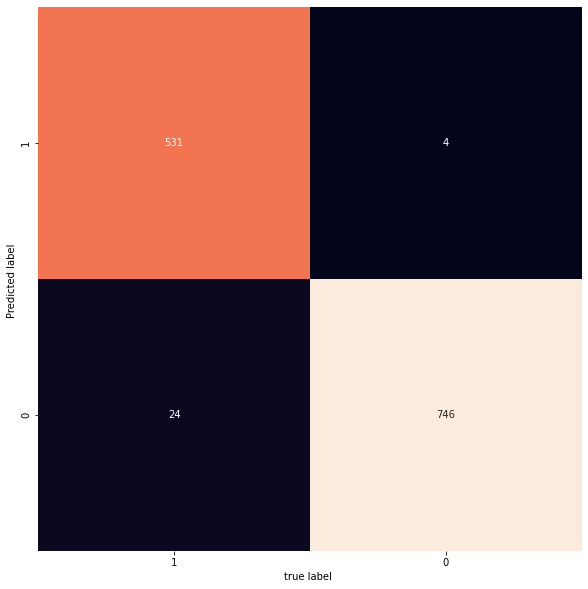

In [73]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel("true label ")
plt.ylabel("Predicted label ")

## Big data prediction

In [74]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

In [75]:
df_ = pd.read_csv("Data/sentiment_tweets.csv",  encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df_.head()

target         ids                          date      flag  \
0  0       1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  0       1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  0       1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  0       1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  0       1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user  \
0  _TheSpecialOne_   
1  scotthamilton     
2  mattycus          
3  ElleCTF           
4  Karoli            

                                                                                                                  text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1  is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!      
2  @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds                            
3  my whole body feels itchy and like its on fire                                                                       
4  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.

In [76]:
df_chunk = df_.iloc[10000:20000]

In [77]:
df_chunk.head()

target         ids                          date      flag  \
10000  0       1550731750  Sat Apr 18 07:05:35 PDT 2009  NO_QUERY   
10001  0       1550731779  Sat Apr 18 07:05:35 PDT 2009  NO_QUERY   
10002  0       1550731783  Sat Apr 18 07:05:35 PDT 2009  NO_QUERY   
10003  0       1550732158  Sat Apr 18 07:05:41 PDT 2009  NO_QUERY   
10004  0       1550732349  Sat Apr 18 07:05:43 PDT 2009  NO_QUERY   

                  user  \
10000  ARoadRetraveled   
10001  brendandebeasi    
10002  brendandebeasi    
10003  siumuimui         
10004  angiecas04        

                                                                                                                                            text  
10000  I think there's a problem with the ISP in this area or something...my connection go too slow to do anything online yesterday &amp; today   
10001  @ nawong How do I go about getting access to idzr.org I'm dying to try it out                                                              
10002  @ nawong How do I go about getting access to idzr.org I'm dying to try it out                                                              
10003  Talking to designers...I can't squeeze any design juice from my brain...for my personal website.                                           
10004  Rainy day

### clean data

In [78]:
df_chunk["text"] = df_chunk["text"].apply(clean_tweets)

C:\Users\HP\AppData\Local\Temp\ipykernel_13004\3429929211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk["text"] = df_chunk["text"].apply(clean_tweets)


In [79]:
df_chunk = df_chunk[["text"]]

In [80]:
# df_chunk.to_csv("chunk.csv")

In [81]:
# df__ = pd.read_csv("chunk.csv")

In [82]:
df_chunk.head()

text
10000  I think theres a problem with the ISP in this area or something...my connection go too slow to do anything online yesterday &amp; today 
10001  nawong How do I go about getting access to idzr.org Im dying to try it out                                                              
10002  nawong How do I go about getting access to idzr.org Im dying to try it out                                                              
10003  Talking to designers...I cant squeeze any design juice from my brain...for my personal website.                                         
10004  Rainy day

In [83]:
# df__.drop("Unnamed: 0", axis=1, inplace=True)
df_chunk.dropna(inplace=True)
df_chunk.head()


text
10000  I think theres a problem with the ISP in this area or something...my connection go too slow to do anything online yesterday &amp; today 
10001  nawong How do I go about getting access to idzr.org Im dying to try it out                                                              
10002  nawong How do I go about getting access to idzr.org Im dying to try it out                                                              
10003  Talking to designers...I cant squeeze any design juice from my brain...for my personal website.                                         
10004  Rainy day

In [84]:
chunk_vector = t_vectorizer.transform(df_chunk["text"])

In [85]:
pred = clf.predict(chunk_vector)
pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [86]:
df_chunk.head()

text
10000  I think theres a problem with the ISP in this area or something...my connection go too slow to do anything online yesterday &amp; today 
10001  nawong How do I go about getting access to idzr.org Im dying to try it out                                                              
10002  nawong How do I go about getting access to idzr.org Im dying to try it out                                                              
10003  Talking to designers...I cant squeeze any design juice from my brain...for my personal website.                                         
10004  Rainy day

In [87]:
df_chunk["label"] = pred

In [88]:
df_chunk.head()

text  \
10000  I think theres a problem with the ISP in this area or something...my connection go too slow to do anything online yesterday &amp; today    
10001  nawong How do I go about getting access to idzr.org Im dying to try it out                                                                 
10002  nawong How do I go about getting access to idzr.org Im dying to try it out                                                                 
10003  Talking to designers...I cant squeeze any design juice from my brain...for my personal website.                                            
10004  Rainy day                                                                                                                                  

       label  
10000  1      
10001  0      
10002  0      
10003  1      
10004  1

In [89]:
df_chunk["label"].value_counts()

1    8842
0    1158
Name: label, dtype: int64

In [90]:
df_other = df_chunk[df_chunk["label"] == 1]

In [91]:
df_chunk = df_chunk[df_chunk["label"] == 0]
df_chunk.iloc[30:50]

text  \
10366  Slept in the same bed as my 4 year old brother. It was a rough night. I think he beat me up in my sleep cause my back hurts now           
10372  dudu was too naughty to sleep , what a bad girl                                                                                           
10377  Im doing well! Its beautiful here and im stuck in class but going out tonight shall be fun! How are you??                                 
10391  On the way to D.C. for the day with Jillian. Were on a charter bus anD I have to pee really bad. Were in traffic                          
10392  it doesnt make me laugh either,my friend hacked my twitter im sorry                                                                       
10406  Im filling out information for PRS, its horrible                                                                                          
10421  i hate sleeping alone                                                                                                                     
10432  hallmark its almost over tho                                                                                                              
10441  gaahh its soo earlyy                                                                                                                      
10442  not gonna get 8 hours sleep. ITS 12:08am                                                                                                  
10449  have fun!im studying and its sunny outside!                                                                                               
10452  hi ho, hi ho... its off to work...                                                                                                        
10458  im lonely keep me company! 22 female, california                                                                                          
10470  exactly. Bad averts. and they should have ads for DQ at night when it is closed. That is cruel and unusual punishment                     
10475  Its all ending so fast                                                                                                                    
10482  Is it wrong to take pictures of a firetruck funeral procession? If so Im a jerk. Although I did it before realizing what was going on.    
10488  man... Im nervous for today haha fuck you rachael for leaving me                                                                          
10492  im lonely keep me company! 22 female, Bismarck - North Dakota                                                                             
10495  Cant Im already going out                                                                                                                 
10496  thanks! Ive been here all day but neglecting my twitter                                                                                   

       label  
10366  0      
10372  0      
10377  0      
10391  0      
10392  0      
10406  0      
10421  0      
10432  0      
10441  0      
10442  0      
10449  0      
10452  0      
10458  0      
10470  0      
10475  0      
10482  0      
10488  0      
10492  0      
10495  0      
10496  0

In [92]:
# def create_wordcloud(dataset, title="Wordcloud", column_name="text"):
#     text_to_analyze = ''
#     for i in dataset[column_name]:
#         text_to_analyze = text_to_analyze + ' ' + i
#     wc = WordCloud(collocations=False, stopwords=STOPWORDS, background_color='white', colormap='Dark2',
#                 max_font_size=150, random_state=42)
#     wc = wc.generate(text_to_analyze)
#     # Wordcloud plot
#     plt.rcParams['figure.figsize'] = [10, 10]
#     plt.imshow(wc, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(title)
#     plt.show()

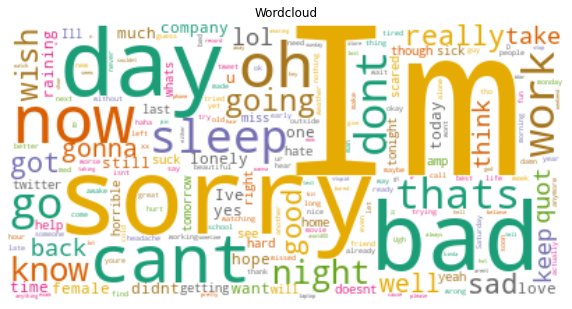

In [93]:
create_wordcloud(df_chunk)

In [94]:
df_other.head()

text  \
10000  I think theres a problem with the ISP in this area or something...my connection go too slow to do anything online yesterday &amp; today    
10003  Talking to designers...I cant squeeze any design juice from my brain...for my personal website.                                            
10004  Rainy day                                                                                                                                  
10005  completely failed to upload my cute picture. Format too big                                                                                
10006  Hrm, scanner traffic diminishes greatly when your public services are on strike.                                                           

       label  
10000  1      
10003  1      
10004  1      
10005  1      
10006  1

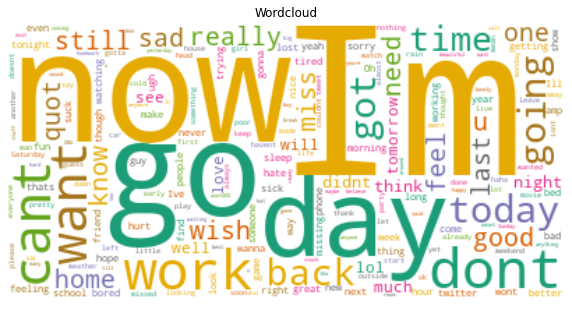

In [95]:
create_wordcloud(df_other)